## House Price Prediction Project

* A real estate agent gives you some information about a bunch of houses in regions of the United States.
* This data has taken from USA site, and this data is already preproccessed.

The data contains the following columns:

| Feature Name                 | Feature Description                                       |
|------------------------------|-----------------------------------------------------------|
| Avg. Area Income             | Avg. Income of residents of the city house is located in. |
| Avg. Area House Age          | Avg Age of Houses in same city                            |
| Avg. Area Number of Rooms    | Avg Number of Rooms for Houses in same city               |
| Avg. Area Number of Bedrooms | Avg Number of Bedrooms for Houses in same city            |
| Area Population              | Population of city house is located in                    |
| Price                        | Price that the house sold at                              |
| Address                      | Address for the house                                     |

## Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from yellowbrick.target import FeatureCorrelation
from sklearn.model_selection import train_test_split, cross_val_score
from yellowbrick.regressor import ResidualsPlot, PredictionError
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

## Load Dataset 

In [3]:
df = pd.read_csv('../dataset/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Dataset Understanding

In [4]:
df.shape

(5000, 7)

In [5]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df.drop('Address', inplace=True, axis=1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [10]:
df.notna().sum()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms    5000
Area Population                 5000
Price                           5000
dtype: int64

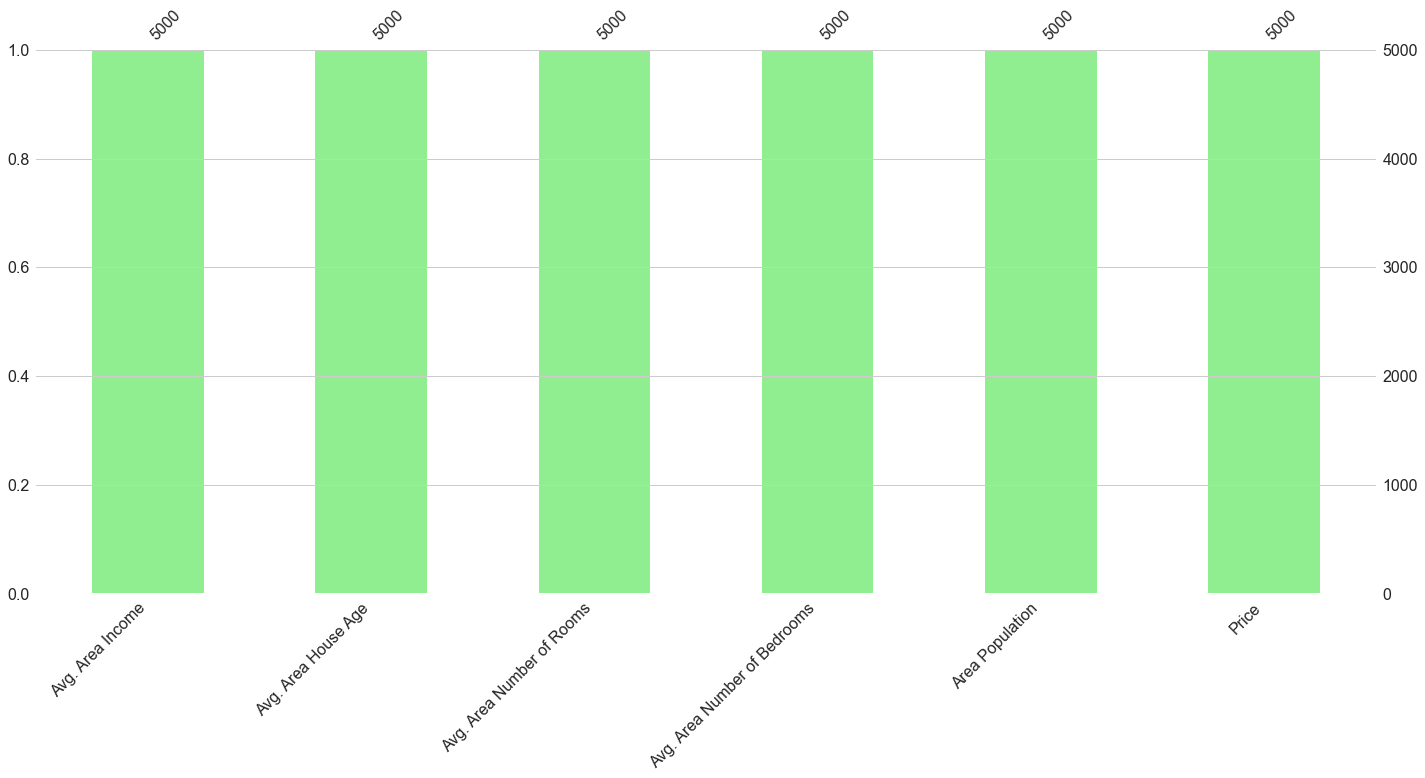

In [11]:
msno.bar(df, color="lightgreen")
plt.show()

## Exploratory data analysis

### Univariate Analysis

In [12]:
numerical_columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
                     'Area Population', 'Avg. Area Number of Bedrooms', 'Price']

In [13]:
def univariate_plotting(df, var):
    fig, axes = plt.subplots(2,2,figsize=(14,10))
    sns.histplot(x = df[var], ax = axes[0][0])
    sns.violinplot(y = df[var], ax = axes[0][1])
    sns.kdeplot(x = df[var], ax = axes[1][0], fill=True)
    sns.kdeplot(x = df[var], ax = axes[1][1], fill=True, cumulative=True)
    plt.suptitle(var.title())
    plt.show()

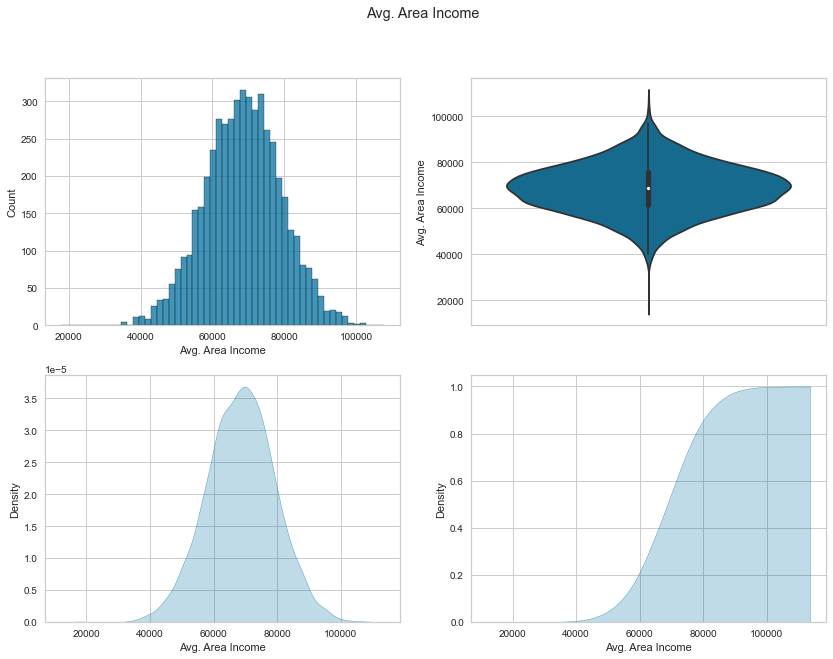

In [14]:
univariate_plotting(df, numerical_columns[0])

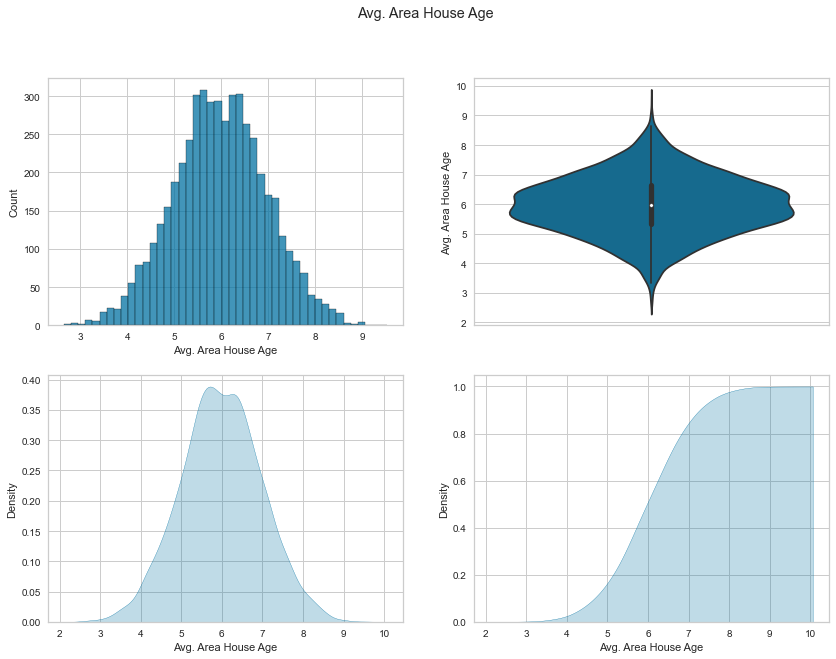

In [15]:
univariate_plotting(df, numerical_columns[1])

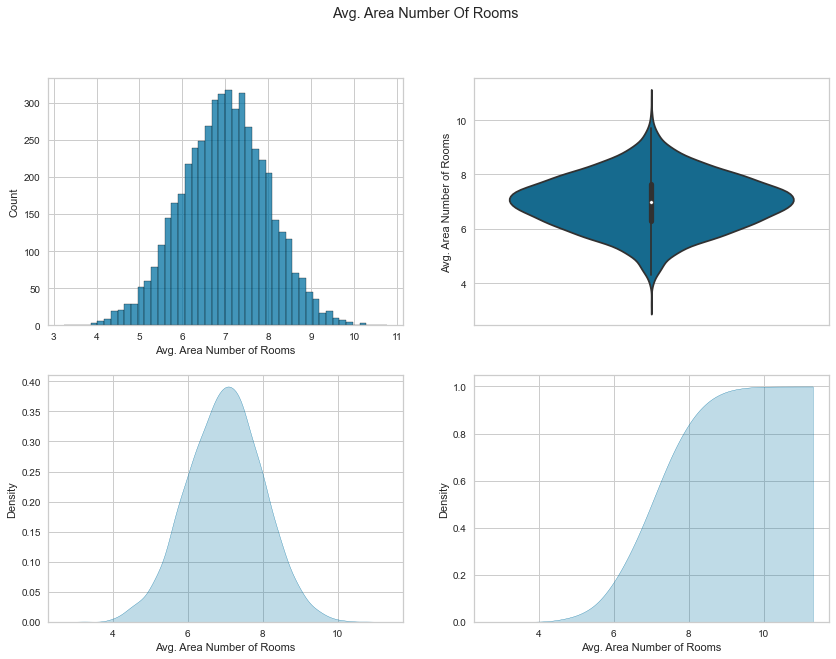

In [16]:
univariate_plotting(df, numerical_columns[2])

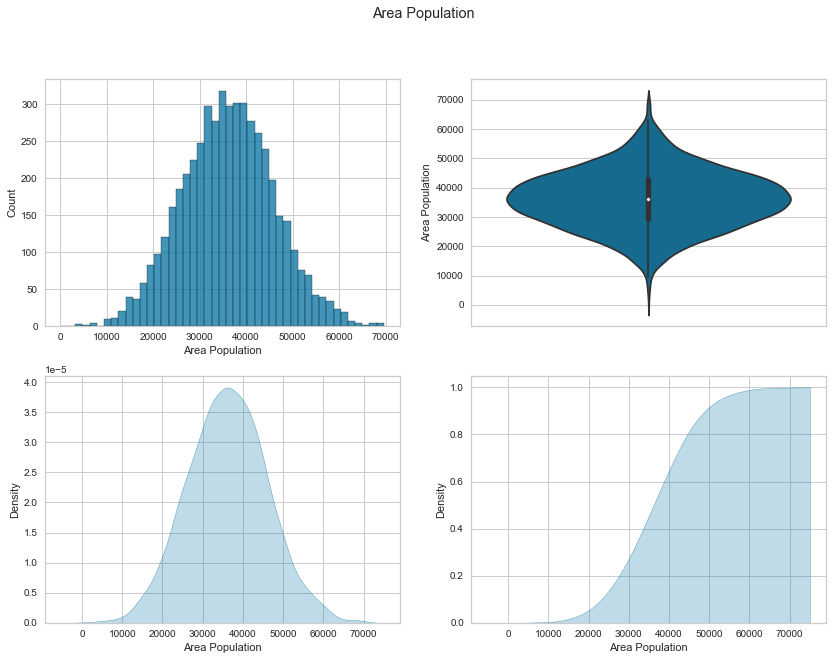

In [17]:
univariate_plotting(df, numerical_columns[3])

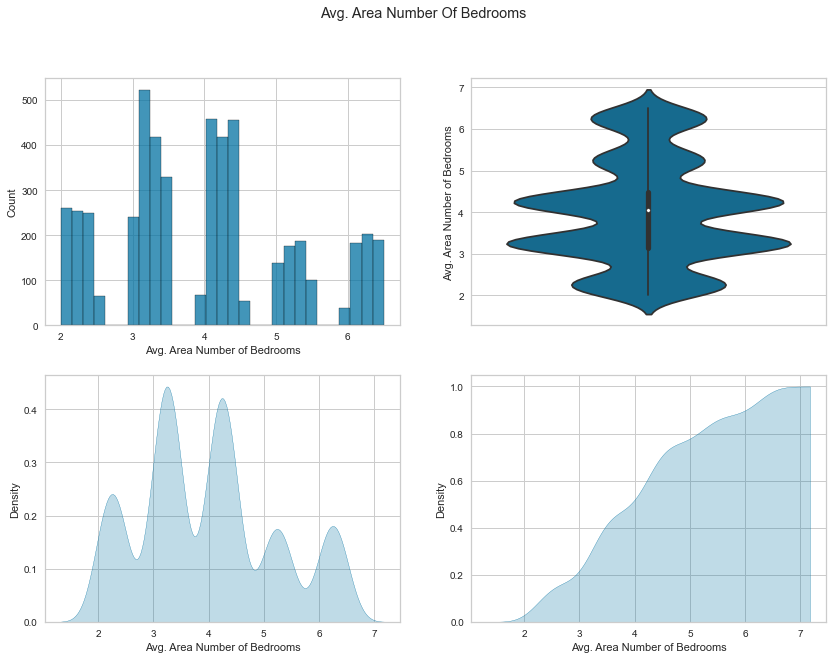

In [18]:
univariate_plotting(df, numerical_columns[4])

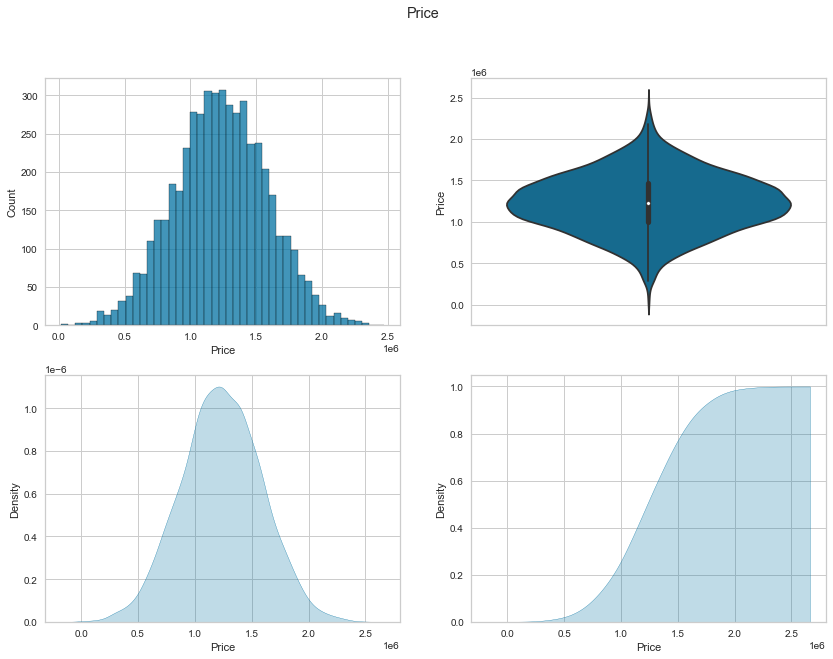

In [19]:
univariate_plotting(df, numerical_columns[5])

### Correlation Heatmap

In [20]:
resign_corr = df.corr()
resign_corr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


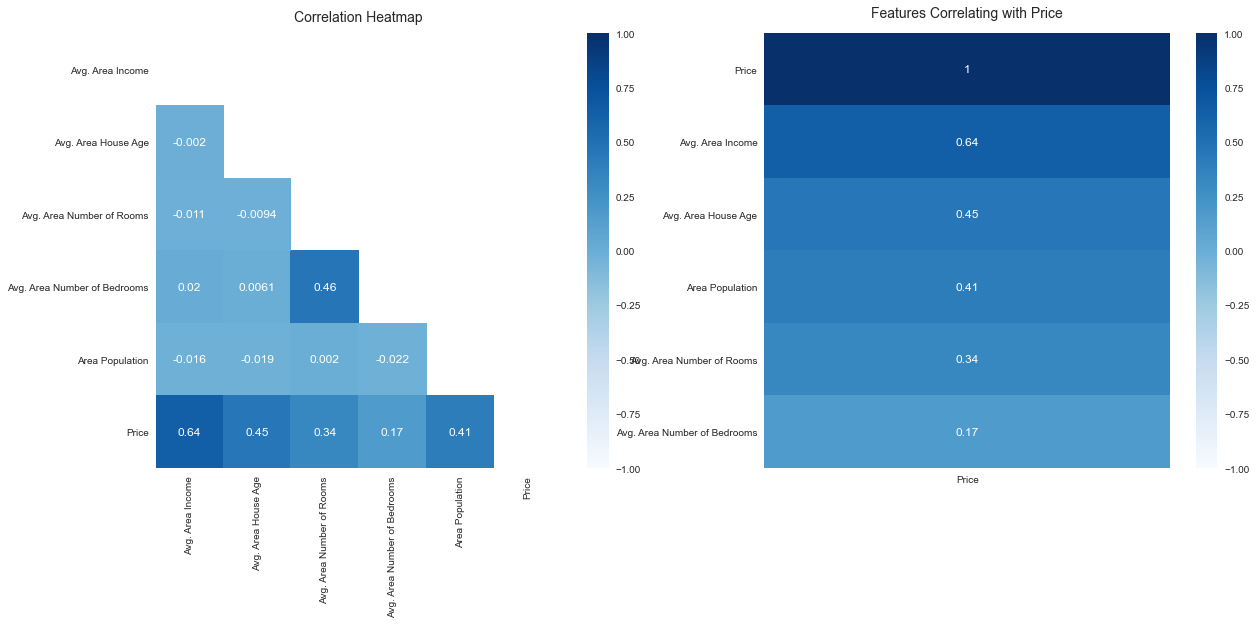

In [21]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True,ax=ax[0], cmap="Blues")
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

heatmap = sns.heatmap(resign_corr[['Price']].sort_values(by='Price', ascending=False),
                      vmin=-1, vmax=1, annot=True,ax=ax[1], cmap="Blues")
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':14}, pad=16)
plt.show()

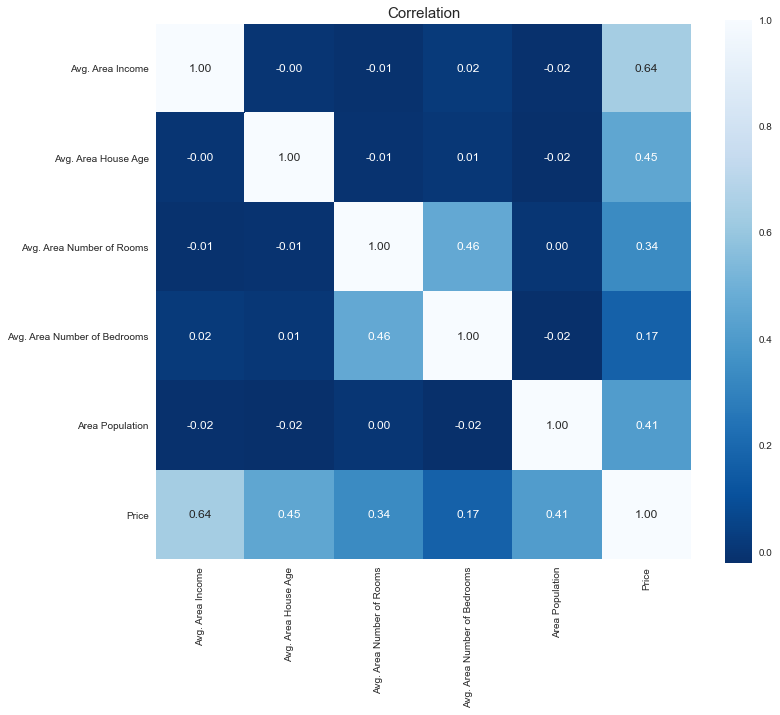

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(resign_corr, annot=True,fmt =".2f",square=True,cmap='Blues_r')
plt.title("Correlation",size = 15)
plt.show()

### Multivariate Analysis

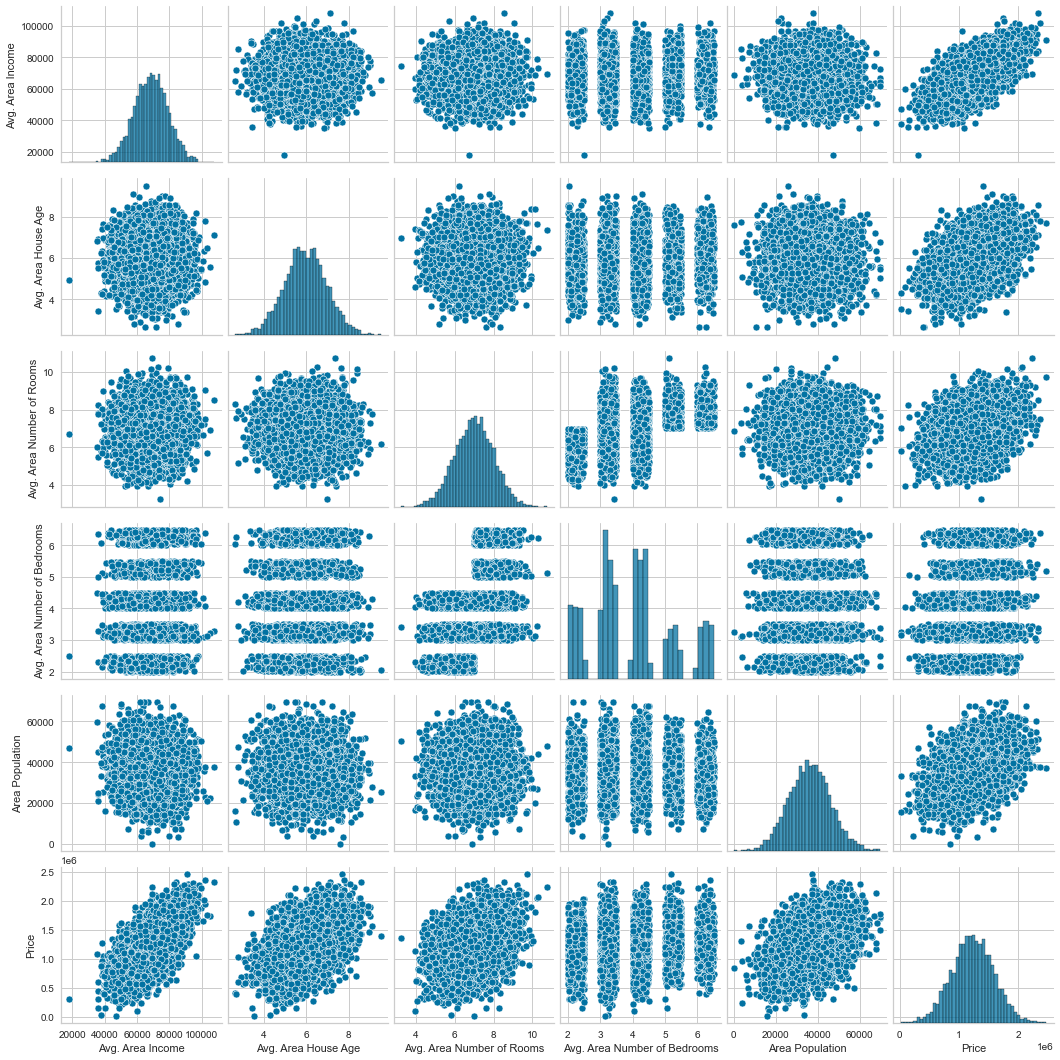

In [23]:
sns.pairplot(df)
plt.show()

## Data Splitting

In [24]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [25]:
X[:5]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [26]:
y[:5]

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

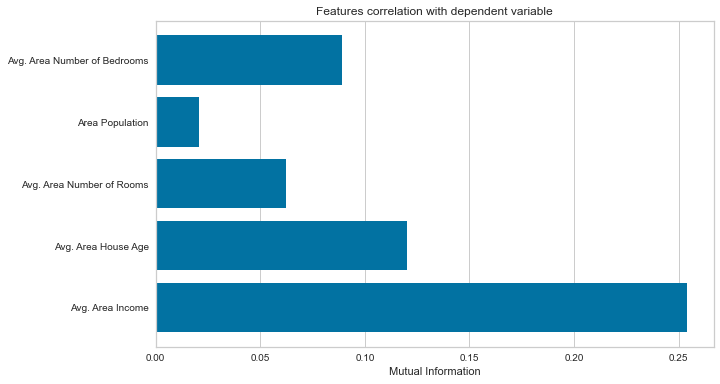

In [27]:
plt.figure(figsize=(10,6))
visualizer = FeatureCorrelation(method='mutual_info-regression',
                                labels= numerical_columns[:-1])
visualizer.fit(X, y,)        
visualizer.show()
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
X_train[:5]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2913,80196.242251,6.675697,7.275193,3.17,48694.864144
3275,74130.606324,6.919663,8.266994,3.24,49958.580994
775,67384.000373,7.224281,7.809919,6.43,48918.055356
217,59569.537340,6.279537,7.325380,4.24,31294.652460
1245,58385.215373,7.588559,6.406118,2.30,41930.375009


In [30]:
y_train[:5]

2913    1.616937e+06
3275    1.881075e+06
775     1.930344e+06
217     8.859206e+05
1245    1.266210e+06
Name: Price, dtype: float64

In [31]:
X_test[:5]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
398,61200.726175,5.299694,6.234615,4.23,42789.692217
3833,63380.814670,5.344664,6.001574,2.45,40217.333577
4836,71208.269301,5.300326,6.077989,4.01,25696.361741
4572,50343.763518,6.027468,5.160240,4.35,27445.876739
636,54535.453719,5.278065,6.871038,4.41,30852.207006


In [32]:
y_test[:5]

398     894251.068636
3833    932979.360621
4836    920747.911288
4572    691854.921027
636     732733.236293
Name: Price, dtype: float64

## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [34]:
lr_reg.intercept_

-2646630.5310559142

In [35]:
coeff_df = pd.DataFrame(lr_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.660408
Avg. Area House Age,165809.651149
Avg. Area Number of Rooms,120329.407877
Avg. Area Number of Bedrooms,2193.095579
Area Population,15.285885


In [36]:
y_pred = lr_reg.predict(X_test)
y_train_pred = lr_reg.predict(X_train)

### Prediction Error 

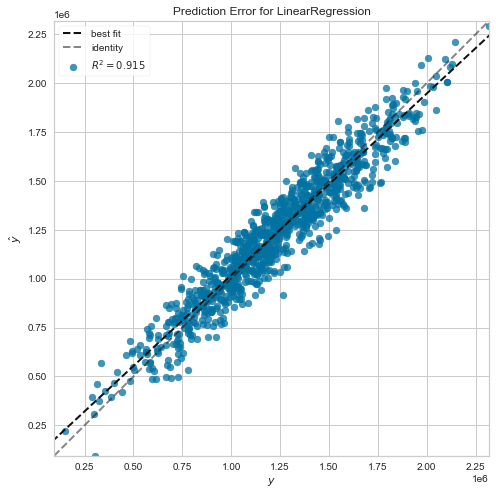

In [37]:
plt.figure(figsize=(16, 8))
visualizer = PredictionError(lr_reg)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()
plt.show()

### Residuals Plot

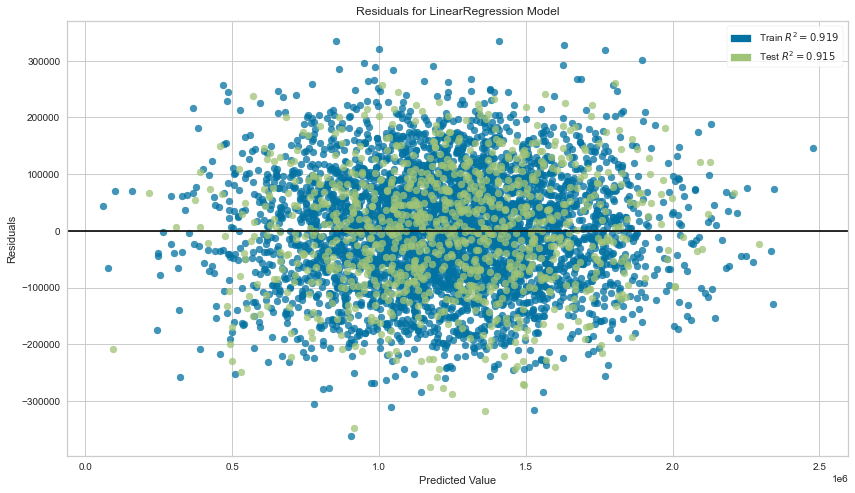

In [38]:
plt.figure(figsize=(14, 8))
visualizer = ResidualsPlot(lr_reg, hist=False)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()
plt.show()

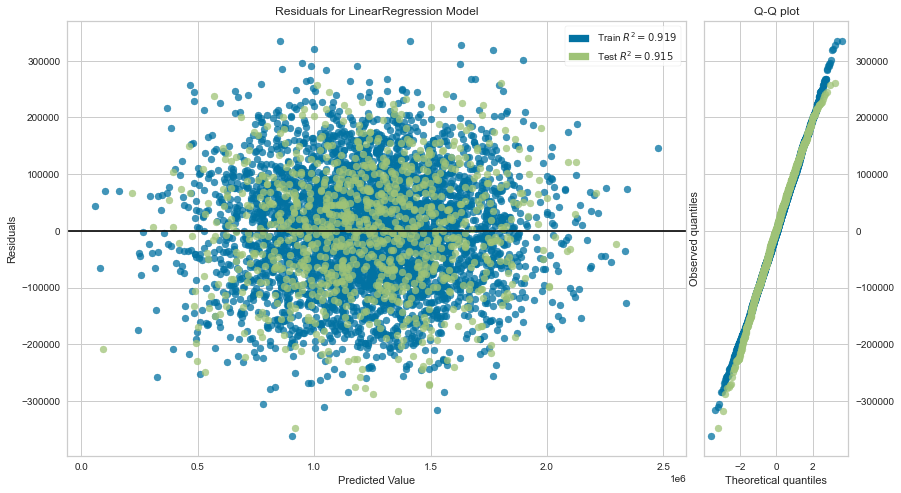

In [39]:
plt.figure(figsize=(14, 8))
visualizer = ResidualsPlot(lr_reg, qqplot=True, hist=False)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()
plt.show()

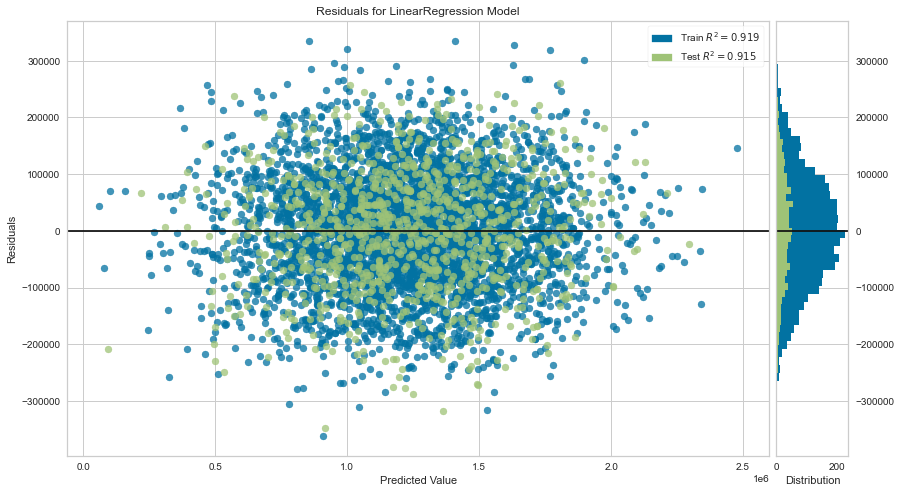

In [40]:
plt.figure(figsize=(14, 8))
visualizer = ResidualsPlot(lr_reg, hist=True)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()
plt.show()

### Results from model creation

In [41]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted) * 100
    accuracy = explained_variance_score(true, predicted) * 100
    return mae, mse, rmse, r2_square, accuracy

In [42]:
res_df=pd.DataFrame(data=[["Testing Set", *evaluate(y_train, y_train_pred),cross_val(lr_reg)], 
                          ["Training Set", *evaluate(y_test, y_pred),cross_val(lr_reg)]] ,
                    columns=['Dataset','MAE','MSE','RMSE','R2 square','Explained Variance Score', 'Cross validation'])
res_df                 

,Dataset,MAE,MSE,RMSE,R2 square,Explained Variance Score,Cross validation
0,Testing Set,81040.871388,1.013963e+10,100695.751773,91.884011,91.884011,0.917379
1,Training Set,82657.946059,1.054972e+10,102711.838101,91.464545,91.466083,0.917379


## Saving ML Model

In [43]:
import os
import joblib
if not os.path.exists('../models/'):
    os.mkdir('../models/')
joblib.dump(lr_reg, '../models/' + lr_reg.__class__.__name__ + '.pkl')

['../models/LinearRegression.pkl']

In [44]:
for file in os.listdir(path='../models/'):
    if file.endswith('.pkl'):
        print(file)

LinearRegression.pkl
